# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

# Dataset Exploration

In [3]:
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
data.describe().T

count        mean           std        min  \
Unit price               1000.0   55.672130  2.649463e+01  10.080000   
Quantity                 1000.0    5.510000  2.923431e+00   1.000000   
Tax 5%                   1000.0   15.379369  1.170883e+01   0.508500   
Total                    1000.0  322.966749  2.458853e+02  10.678500   
cogs                     1000.0  307.587380  2.341765e+02  10.170000   
gross margin percentage  1000.0    4.761905  6.220360e-14   4.761905   
gross income             1000.0   15.379369  1.170883e+01   0.508500   
Rating                   1000.0    6.972700  1.718580e+00   4.000000   

                                25%         50%         75%          max  
Unit price                32.875000   55.230000   77.935000    99.960000  
Quantity                   3.000000    5.000000    8.000000    10.000000  
Tax 5%                     5.924875   12.088000   22.445250    49.650000  
Total                    124.422375  253.848000  471.350250  1042.650000  
cogs                     118.497500  241.760000  448.905000   993.000000  
gross margin percentage    4.761905    4.761905    4.761905     4.761905  
gross income               5.924875   12.088000   22.445250    49.650000  
Rating                     5.500000    7.000000    8.500000    10.000000

In [6]:
data.select_dtypes(object).describe().T

count unique                  top freq
Invoice ID     1000   1000          633-91-1052    1
Branch         1000      3                    A  340
City           1000      3               Yangon  340
Customer type  1000      2               Member  501
Gender         1000      2               Female  501
Product line   1000      6  Fashion accessories  178
Date           1000     89             2/7/2019   20
Time           1000    506                14:42    7
Payment        1000      3              Ewallet  345

# Data Preprocessing

In [7]:
data.head(1)

Invoice ID Branch    City Customer type  Gender       Product line  \
0  750-67-8428      A  Yangon        Member  Female  Health and beauty   

   Unit price  Quantity   Tax 5%     Total      Date   Time  Payment    cogs  \
0       74.69         7  26.1415  548.9715  1/5/2019  13:08  Ewallet  522.83   

   gross margin percentage  gross income  Rating  
0                 4.761905       26.1415     9.1

## Rename Columns

In [8]:
print(list(data.columns))

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [9]:
data.rename(columns = {'Tax 5%': 'Tax 5 percent'}, inplace = True)

In [10]:
data.columns = data.columns.str.replace(' ', '_')

In [11]:
data.columns = data.columns.str.lower()

In [12]:
print(list(data.columns))

['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'unit_price', 'quantity', 'tax_5_percent', 'total', 'date', 'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']


## Convert Dtype

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5_percent            1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [14]:
data["date_time"] = data["date"] + " " + data["time"]
data["date_time"] = pd.to_datetime(data["date_time"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5_percent            1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   object        
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

## Drop Columns

In [16]:
data.drop(columns = ["date", "time"], inplace  = True)

In [17]:
data.head(1)

invoice_id branch    city customer_type  gender       product_line  \
0  750-67-8428      A  Yangon        Member  Female  Health and beauty   

   unit_price  quantity  tax_5_percent     total  payment    cogs  \
0       74.69         7        26.1415  548.9715  Ewallet  522.83   

   gross_margin_percentage  gross_income  rating           date_time  
0                 4.761905       26.1415     9.1 2019-01-05 13:08:00

## Create New Column

In [18]:
data["branch_location"] = data["branch"] + " - " + data["city"]

## Reorder Columns

In [19]:
cat_col =  ["date_time"] + list(data.select_dtypes(object).columns)
num_col = list(data.select_dtypes("number").columns)
data = data[list(cat_col + num_col)]

In [20]:
data.head(1)

date_time   invoice_id branch    city customer_type  gender  \
0 2019-01-05 13:08:00  750-67-8428      A  Yangon        Member  Female   

        product_line  payment branch_location  unit_price  quantity  \
0  Health and beauty  Ewallet      A - Yangon       74.69         7   

   tax_5_percent     total    cogs  gross_margin_percentage  gross_income  \
0        26.1415  548.9715  522.83                 4.761905       26.1415   

   rating  
0     9.1

# Understanding Data

## Categorical

In [21]:
data["date_time"].dt.date.describe()

count           1000
unique            89
top       2019-02-07
freq              20
Name: date_time, dtype: object

In [22]:
data["date_time"].dt.month.value_counts()

1    352
3    345
2    303
Name: date_time, dtype: int64

In [23]:
data["date_time"].dt.year.value_counts()

2019    1000
Name: date_time, dtype: int64

In [24]:
data["branch"].value_counts()

A    340
B    332
C    328
Name: branch, dtype: int64

In [25]:
data["city"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

In [26]:
data.groupby(["city", "branch"]).count()[["invoice_id"]]

invoice_id
city      branch            
Mandalay  B              332
Naypyitaw C              328
Yangon    A              340

In [27]:
data["customer_type"].value_counts()

Member    501
Normal    499
Name: customer_type, dtype: int64

In [28]:
data["gender"].value_counts()

Female    501
Male      499
Name: gender, dtype: int64

In [29]:
data["product_line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [30]:
data["payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

## Numerical

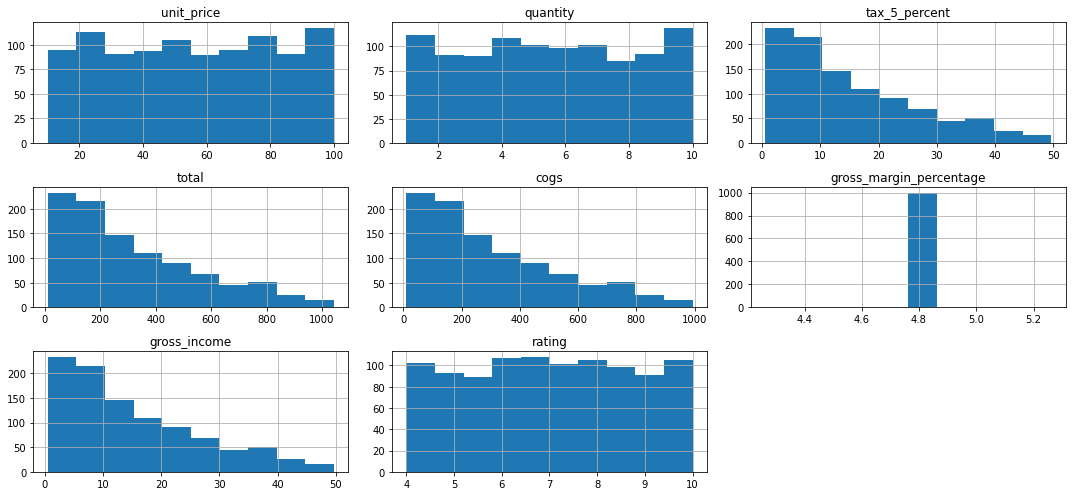

In [31]:
plt.figure(figsize = (15, 7))
for i in range(len(data.select_dtypes("number").columns)):
    plt.subplot(3, 3, i + 1)
    data[data.select_dtypes("number").columns[i]].hist()
    plt.title(data.select_dtypes("number").columns[i])
    plt.tight_layout()

- unit_price, quantity, rating, and gross_margin_percentage are normally distributed
- tax_5_percent, total, cogs, and gross_income are right skewed.

In [32]:
data

date_time   invoice_id branch       city customer_type  gender  \
0   2019-01-05 13:08:00  750-67-8428      A     Yangon        Member  Female   
1   2019-03-08 10:29:00  226-31-3081      C  Naypyitaw        Normal  Female   
2   2019-03-03 13:23:00  631-41-3108      A     Yangon        Normal    Male   
3   2019-01-27 20:33:00  123-19-1176      A     Yangon        Member    Male   
4   2019-02-08 10:37:00  373-73-7910      A     Yangon        Normal    Male   
..                  ...          ...    ...        ...           ...     ...   
995 2019-01-29 13:46:00  233-67-5758      C  Naypyitaw        Normal    Male   
996 2019-03-02 17:16:00  303-96-2227      B   Mandalay        Normal  Female   
997 2019-02-09 13:22:00  727-02-1313      A     Yangon        Member    Male   
998 2019-02-22 15:33:00  347-56-2442      A     Yangon        Normal    Male   
999 2019-02-18 13:28:00  849-09-3807      A     Yangon        Member  Female   

               product_line      payment branch_location  unit_price  \
0         Health and beauty      Ewallet      A - Yangon       74.69   
1    Electronic accessories         Cash   C - Naypyitaw       15.28   
2        Home and lifestyle  Credit card      A - Yangon       46.33   
3         Health and beauty      Ewallet      A - Yangon       58.22   
4         Sports and travel      Ewallet      A - Yangon       86.31   
..                      ...          ...             ...         ...   
995       Health and beauty      Ewallet   C - Naypyitaw       40.35   
996      Home and lifestyle      Ewallet    B - Mandalay       97.38   
997      Food and beverages         Cash      A - Yangon       31.84   
998      Home and lifestyle         Cash      A - Yangon       65.82   
999     Fashion accessories         Cash      A - Yangon       88.34   

     quantity  tax_5_percent      total    cogs  gross_margin_percentage  \
0           7        26.1415   548.9715  522.83                 4.761905   
1           5         3.8200    80.2200   76.40                 4.761905   
2           7        16.2155   340.5255  324.31                 4.761905   
3           8        23.2880   489.0480  465.76                 4.761905   
4           7        30.2085   634.3785  604.17                 4.761905   
..        ...            ...        ...     ...                      ...   
995         1         2.0175    42.3675   40.35                 4.761905   
996        10        48.6900  1022.4900  973.80                 4.761905   
997         1         1.5920    33.4320   31.84                 4.761905   
998         1         3.2910    69.1110   65.82                 4.761905   
999         7        30.9190   649.2990  618.38                 4.761905   

     gross_income  rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

# Choosing Data for Dashboard

I will use all categorical columns and 2 numerical columns which are gross_income, rating, and total.

In [33]:
data_final = data.drop(columns = ["unit_price", "quantity", "tax_5_percent", "cogs", "gross_margin_percentage"])
data_final

date_time   invoice_id branch       city customer_type  gender  \
0   2019-01-05 13:08:00  750-67-8428      A     Yangon        Member  Female   
1   2019-03-08 10:29:00  226-31-3081      C  Naypyitaw        Normal  Female   
2   2019-03-03 13:23:00  631-41-3108      A     Yangon        Normal    Male   
3   2019-01-27 20:33:00  123-19-1176      A     Yangon        Member    Male   
4   2019-02-08 10:37:00  373-73-7910      A     Yangon        Normal    Male   
..                  ...          ...    ...        ...           ...     ...   
995 2019-01-29 13:46:00  233-67-5758      C  Naypyitaw        Normal    Male   
996 2019-03-02 17:16:00  303-96-2227      B   Mandalay        Normal  Female   
997 2019-02-09 13:22:00  727-02-1313      A     Yangon        Member    Male   
998 2019-02-22 15:33:00  347-56-2442      A     Yangon        Normal    Male   
999 2019-02-18 13:28:00  849-09-3807      A     Yangon        Member  Female   

               product_line      payment branch_location      total  \
0         Health and beauty      Ewallet      A - Yangon   548.9715   
1    Electronic accessories         Cash   C - Naypyitaw    80.2200   
2        Home and lifestyle  Credit card      A - Yangon   340.5255   
3         Health and beauty      Ewallet      A - Yangon   489.0480   
4         Sports and travel      Ewallet      A - Yangon   634.3785   
..                      ...          ...             ...        ...   
995       Health and beauty      Ewallet   C - Naypyitaw    42.3675   
996      Home and lifestyle      Ewallet    B - Mandalay  1022.4900   
997      Food and beverages         Cash      A - Yangon    33.4320   
998      Home and lifestyle         Cash      A - Yangon    69.1110   
999     Fashion accessories         Cash      A - Yangon   649.2990   

     gross_income  rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 12 columns]

In [34]:
data_final.to_csv("supermarket_sales_preprocessed.csv", index = False)